In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
#reading train_data
train_data=pd.read_csv(r"E:\ml_ai_ict\kaggle\train_E1GspfA.csv")

In [3]:
train_data.head()

,date,hour,demand
0,18-08-2018,9,91
1,18-08-2018,10,21
2,18-08-2018,13,23
3,18-08-2018,14,104
4,18-08-2018,15,81


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [5]:
#checking null values
train_data.isna().sum()

date      0
hour      0
demand    0
dtype: int64

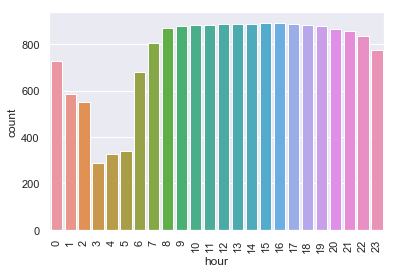

In [6]:
#Count plot
sns.set(style="darkgrid")
ax = sns.countplot(x='hour',  data=train_data)
plt.xticks(rotation=90)
plt.show()

In [7]:
#converting date column to datetime
import datetime
train_data["date"]=pd.to_datetime(train_data["date"])

In [8]:
#creating new columns
train_data["day"]=train_data['date'].dt.day
train_data["month"]=train_data['date'].dt.month
train_data["year"]=train_data['date'].dt.year
train_data=train_data.drop(["date"],axis=1)

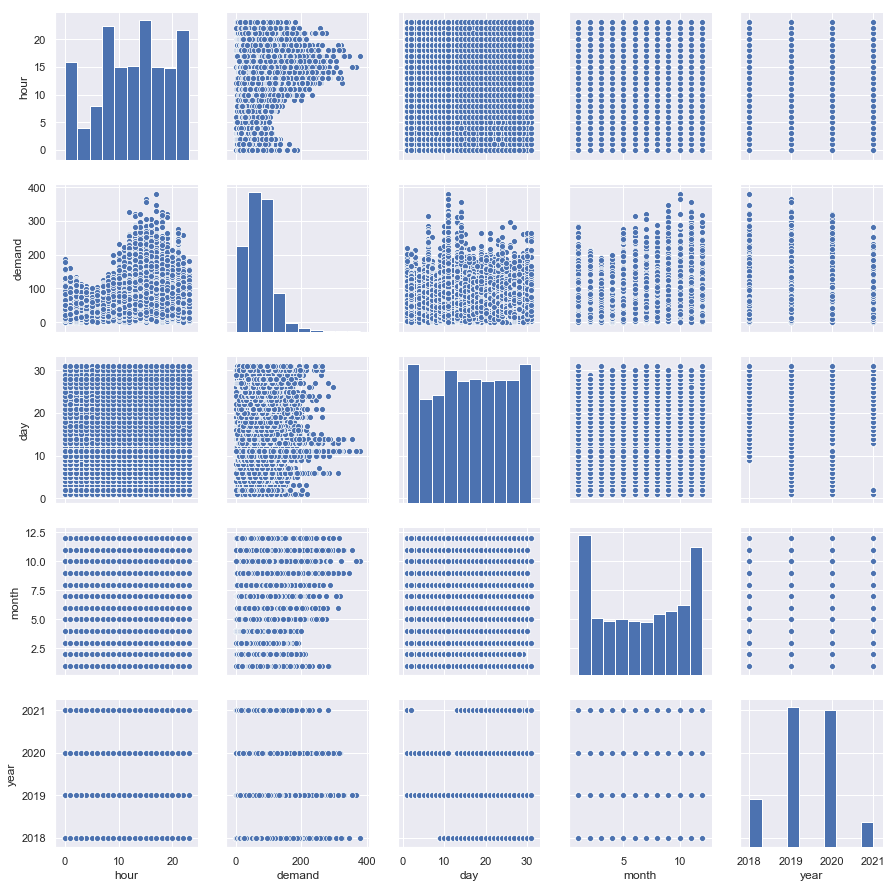

In [9]:
#pairplot
sns.pairplot(train_data)

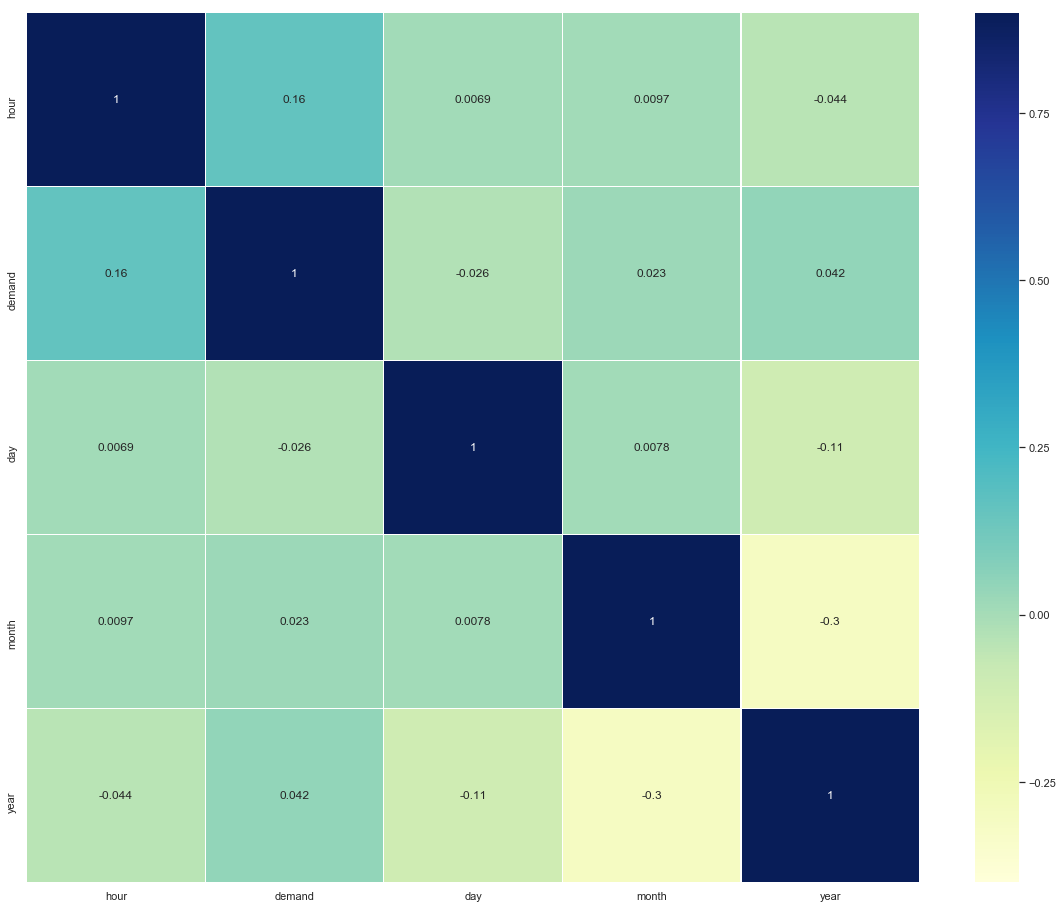

In [10]:
#correlation-heatmap
correl=train_data.corr()
plt.subplots(figsize=(20,16))
sns.heatmap(correl,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

In [11]:
#roupby month
grouped=train_data.groupby(["month"])

In [12]:
i=0
for name,group in grouped:
    i=i+1
rows=i

In [13]:
df=pd.DataFrame(index=np.arange(rows),columns=["month","mean"])

In [14]:
i=0
for name,group in grouped:
    df["month"][i]=name
    df["mean"][i]= group["demand"].mean()
    i=i+1
 

In [15]:
df.head()

,month,mean
0,1,76.771842
1,2,73.553939
2,3,70.202847
3,4,69.841353
4,5,75.461318


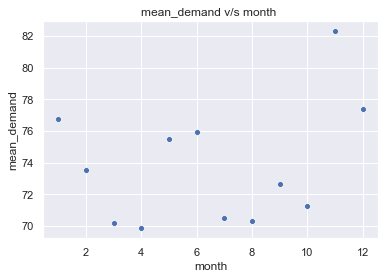

In [16]:

# Adding color to a Seaborn plot
sns.set_style('darkgrid')
sns.scatterplot(
    data=df,
    x='month',
    y='mean',
    
)
plt.title('mean_demand v/s month ')
plt.xlabel('month')
plt.ylabel('mean_demand')
plt.show()

from the plot mean demand is 
1.less than 72 for month=3,4,7,8,10
2.between 72 and 74 for month=2,9
3.between 74 and 76 for month =5,6
4.between 76 and 78 for month=1,12
5.greater than 78 for monh=11

In [17]:
cat1=train_data[train_data["month"].isin([3,4,7,8,10])].index
train_data.loc[cat1,"month_category"]=1
cat2=train_data[train_data["month"].isin([2,9])].index
train_data.loc[cat2,"month_category"]=2
cat3=train_data[train_data["month"].isin([5,6])].index
train_data.loc[cat3,"month_category"]=3
cat4=train_data[train_data["month"].isin([1,12])].index
train_data.loc[cat4,"month_category"]=4
cat5=train_data[train_data["month"]==11].index
train_data.loc[cat5,"month_category"]=5

    

In [18]:
time_cat1=train_data[train_data["hour"].isin([0,1,2,3,4,5])].index
train_data.loc[time_cat1,"time_category"]=1
time_cat2=train_data[train_data["hour"].isin([6,7,8,9,10,11])].index
train_data.loc[time_cat2,"time_category"]=2
time_cat3=train_data[train_data["hour"].isin([12,13,14,15,16,17])].index
train_data.loc[time_cat3,"time_category"]=3
time_cat4=train_data[train_data["hour"].isin([18,19,20,21,22,23])].index
train_data.loc[time_cat4,"time_category"]=4



In [19]:
train_data.head()

,hour,demand,day,month,year,month_category,time_category
0,9,91,18,8,2018,1.0,2.0
1,10,21,18,8,2018,1.0,2.0
2,13,23,18,8,2018,1.0,3.0
3,14,104,18,8,2018,1.0,3.0
4,15,81,18,8,2018,1.0,3.0


In [20]:
#---------------reading test data-------------
test_data=pd.read_csv(r"E:\ml_ai_ict\kaggle\test_6QvDdzb.csv")

In [21]:
test_data.head()

,date,hour
0,01-03-2021,0
1,01-03-2021,1
2,01-03-2021,2
3,01-03-2021,3
4,01-03-2021,5


In [22]:
test_data.isna().sum()

date    0
hour    0
dtype: int64

In [23]:
test_data["date"]=pd.to_datetime(test_data["date"])

In [24]:
test_data["day"]=test_data['date'].dt.day
test_data["month"]=test_data['date'].dt.month
test_data["year"]=test_data['date'].dt.year
test_data=test_data.drop(["date"],axis=1)

In [25]:
cat1=test_data[test_data["month"].isin([3,4,7,8,10])].index
test_data.loc[cat1,"month_category"]=1
cat2=test_data[test_data["month"].isin([2,9])].index
test_data.loc[cat2,"month_category"]=2
cat3=test_data[test_data["month"].isin([5,6])].index
test_data.loc[cat3,"month_category"]=3
cat4=test_data[test_data["month"].isin([1,12])].index
test_data.loc[cat4,"month_category"]=4
cat5=test_data[test_data["month"]==11].index
test_data.loc[cat5,"month_category"]=5


In [26]:
time_cat1=test_data[test_data["hour"].isin([0,1,2,3,4,5])].index
test_data.loc[time_cat1,"time_category"]=1
time_cat2=test_data[test_data["hour"].isin([6,7,8,9,10,11])].index
test_data.loc[time_cat2,"time_category"]=2
time_cat3=test_data[test_data["hour"].isin([12,13,14,15,16,17])].index
test_data.loc[time_cat3,"time_category"]=3
time_cat4=test_data[test_data["hour"].isin([18,19,20,21,22,23])].index
test_data.loc[time_cat4,"time_category"]=4


In [27]:
y=train_data["demand"]
X=train_data.drop(["demand"],axis=1)

In [28]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rand=RandomForestRegressor()
rand.fit(X,y)


RandomForestRegressor()

In [29]:
y_predict=rand.predict(test_data)

In [30]:
submission=pd.read_csv(r"E:\ml_ai_ict\kaggle\sample_4E0BhPN.csv")

In [31]:
submission.head()

,date,hour,demand
0,01-03-2021,0,0
1,01-03-2021,1,0
2,01-03-2021,2,0
3,01-03-2021,3,0
4,01-03-2021,5,0


In [32]:
submission["demand"]=y_predict

In [33]:
submission.head()

,date,hour,demand
0,01-03-2021,0,87.57
1,01-03-2021,1,60.70
2,01-03-2021,2,52.49
3,01-03-2021,3,62.72
4,01-03-2021,5,48.58


In [34]:
submission.to_csv(r"E:\ml_ai_ict\kaggle\output.csv")